# Librerías de Keras/Tensorflow

In [ ]:
# Importamos las librerías de keras/tensorflow
from tensorflow import keras
from tensorflow.keras import layers

# Carga de datos

In [23]:
# Importamos la librería de los datasets de keras y cogemos el de boston_housing
from tensorflow.keras.datasets import boston_housing

# Dataset boston_housing
# Problema de regresión, cálculo del valor de un piso, años 70
# 404 datos de entrenamiento con 13 variables explicativas


# Obtenemos los datos de entrenamiento y test
# separados en las variables explicativas y la objetivo
# 13 variables con las característicias de los pisos (metros, habitaciones, baños, etc)
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

print( train_data[0:5])
print( train_targets[0:5])




(404, 13)
(102, 13)
[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]
[15.2 42.3 50.  21.1 17.7]


# Normalización

In [24]:
# Realizamos la "Normalización" restando la media y dividiendo por la desviación típica
# Ahora tendremos valores (-x,x) alredor de 0, pero en general pequeños
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Creación del modelo

In [25]:
# Creamos el modelo

# Inicializamos el API Secuencial de capas
model = keras.Sequential([
        # Añadimos capa de entrada con las 13 variables explicativas
        keras.Input(shape=(13,)),
        # Añadimos capa densamente conectada con 64 neuronas y activación relu
        layers.Dense(64, activation="relu"),
        # Añadimos capa densamente conectada con 64 neuronas y activación relu
        layers.Dense(64, activation="relu"),
        # Añadimos capa de salida densamente conectada con 1 neurona y activación lineal (para regresión)
        layers.Dense(1)
    ])

# Mostramos el Modelo creado
model.summary()

# Compilamos el modelo definiendo el optimizador, función de pérdida y métrica
# RMSProp, mse, mae
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

# Entrenamos el Modelo

In [14]:
# Realizamos el entrenamiento
# 20 épocos (iteraciones), con tamaño de batch de 16
history = model.fit(train_data, train_targets,
          epochs=20, batch_size=16, verbose=1)


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9073 - mae: 0.6839
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3359 - mae: 0.8455 
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1127 - mae: 0.7883 
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 1.1625 - mae: 0.7730
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 1.2780 - mae: 0.7873
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 1.0982 - mae: 0.7536
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 1.1686 - mae: 0.7893
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 1.1520 - mae: 0.7940
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 1.0778 - mae: 0.7635
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.9543 - mae: 0.7262
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 1.0199 - mae: 0.7472
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 1.1047 - mae: 0.7391
Epoch 13/20
26/26 ━━━━━━━━━━━

# Visualizamos la evolución del entrenamiento

dict_keys(['loss', 'mae'])


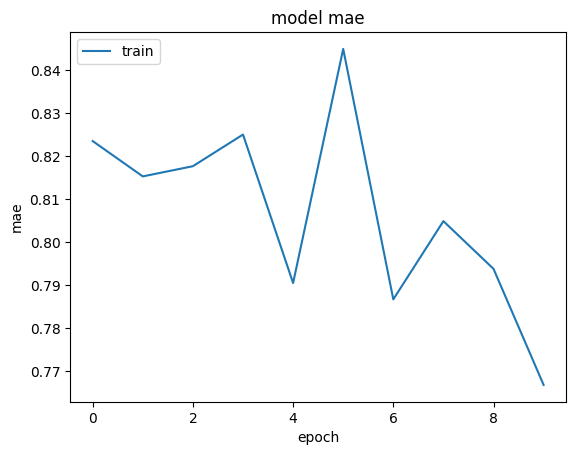

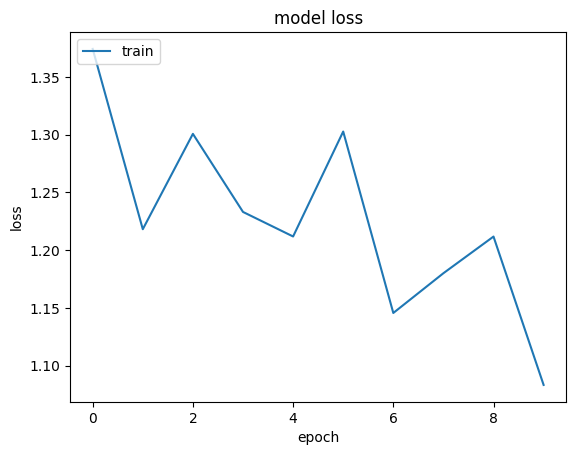

In [11]:
# Importamos la librería de pyplot para pintar gráficas
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mae'])
#plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Hacemos predicciones con los datos de Test

In [18]:
# Evaluamos el modelo con los datos de test
predictions = model.predict(test_data)
print(predictions[0:5])
print(test_targets[0:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
[[ 8.505288]
 [18.133862]
 [19.628218]
 [33.10815 ]
 [22.771269]]
[ 7.2 18.8 19.  27.  22.2]
